In [1]:
# !pip install feyn

In [2]:
import feyn

ql = feyn.QLattice(random_seed=42)

This version of feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at `https://abzu.ai/eula`.


In [3]:
import pandas as pd

data = pd.read_csv("../Runge-Kutta-Integration/rungekutta_prepared.csv")

In [4]:
functions = ["add", "multiply", "exp", "log", "inverse", "sqrt"]

models = ql.auto_run(data, output_name='y', function_names=functions)

In [5]:
sympy_model = models[0].sympify(signif=3)

In [6]:
sympy_model.as_expr()

0.00727*(-0.121*x - 0.921)*(0.127*x - 1.21)*exp(1/(0.496 - 0.0486*x)) - 0.00194

In [7]:
import sympy as smp
from sympy.utilities.lambdify import lambdify

x_symbol = smp.symbols("x")

f = lambdify([x_symbol], sympy_model)

D:\Users\lreis\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


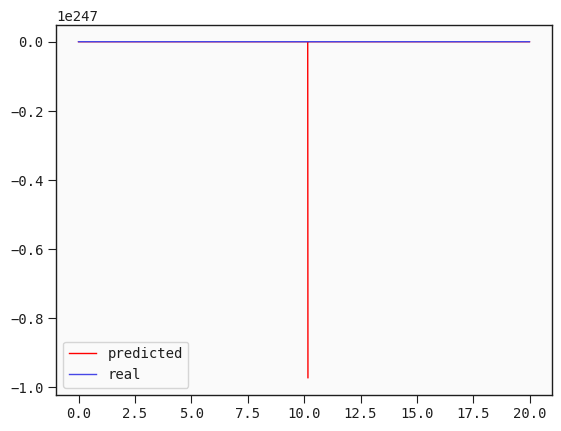

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = data.x
y_model = f(x)
y_real = data.y

plt.plot(x, y_model, label="predicted", c="red", linewidth=1)
plt.plot(x, y_real, label="real", linewidth=1)
plt.legend()
plt.show()

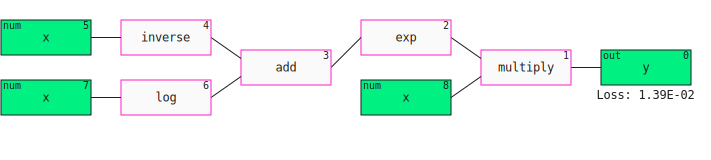

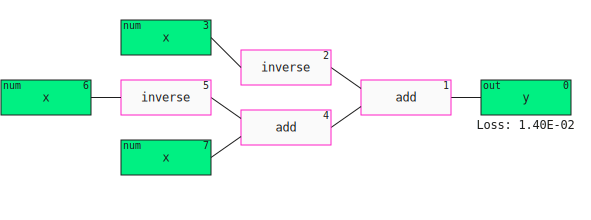

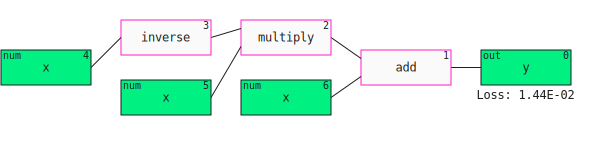

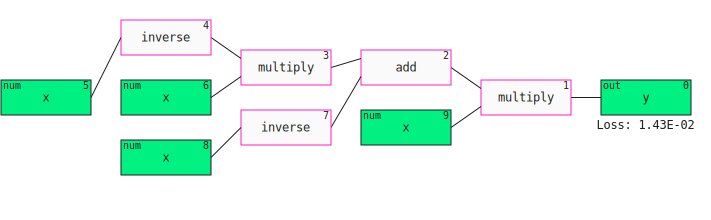

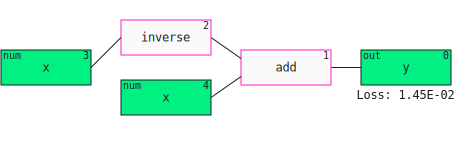

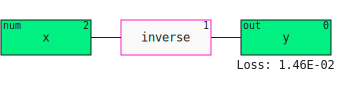

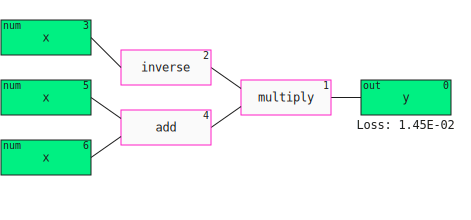

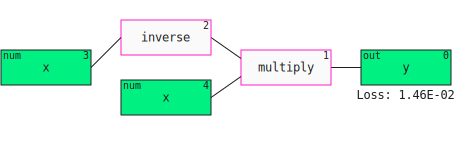

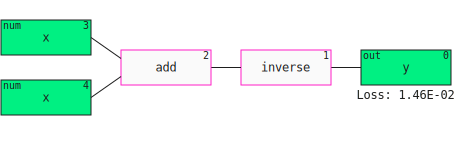

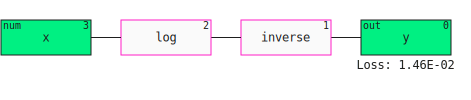

In [9]:
for model in models:
    display(model)